Tian R, et al. CRISPR Interference-Based Platform for Multimodal Genetic Screens in Human iPSC-Derived Neurons. Neuron. 2019 Oct 23;104(2):239-255.e12.

In [2]:
source('./data_processing.R')

In [3]:
my_colors <- c("D" = 'black', 'I' = 'purple', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

# iPSC_lane1

GSM3543620	CROP-seq_iPSC_sgRNA_enrichment_for_lane1

In [4]:
input_dir = './GiRAFR_outputs/Tian_Neuron/sample1/'
output_dir = './figures_results/Tian_Neuron/sample1'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 12623"
[1] "Wildtype UMI: 216577"
[1] "Mutant UMI: 24546"


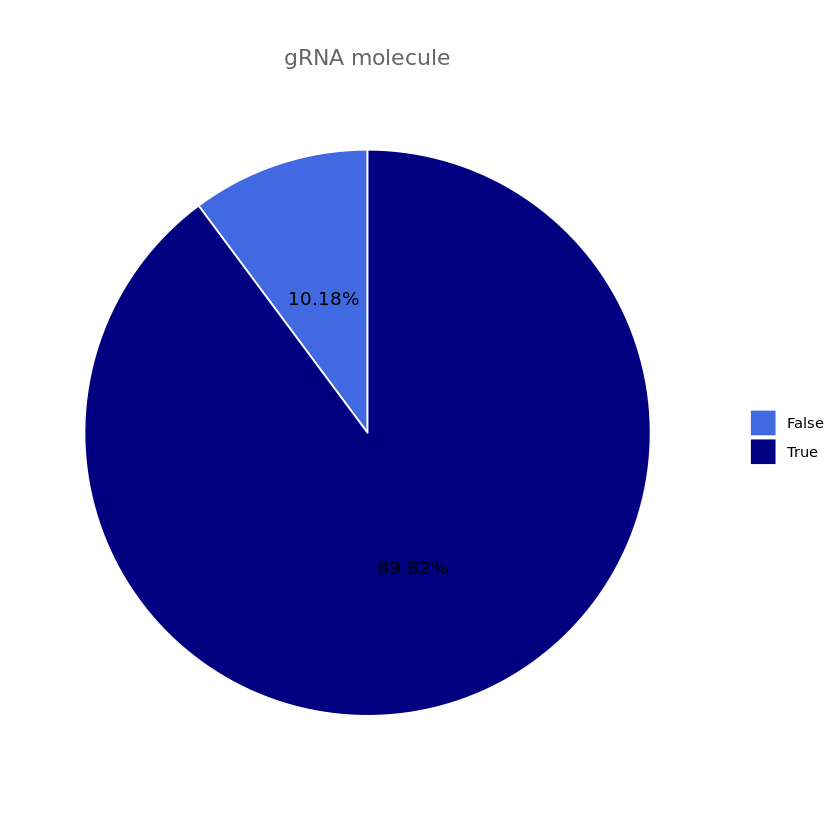

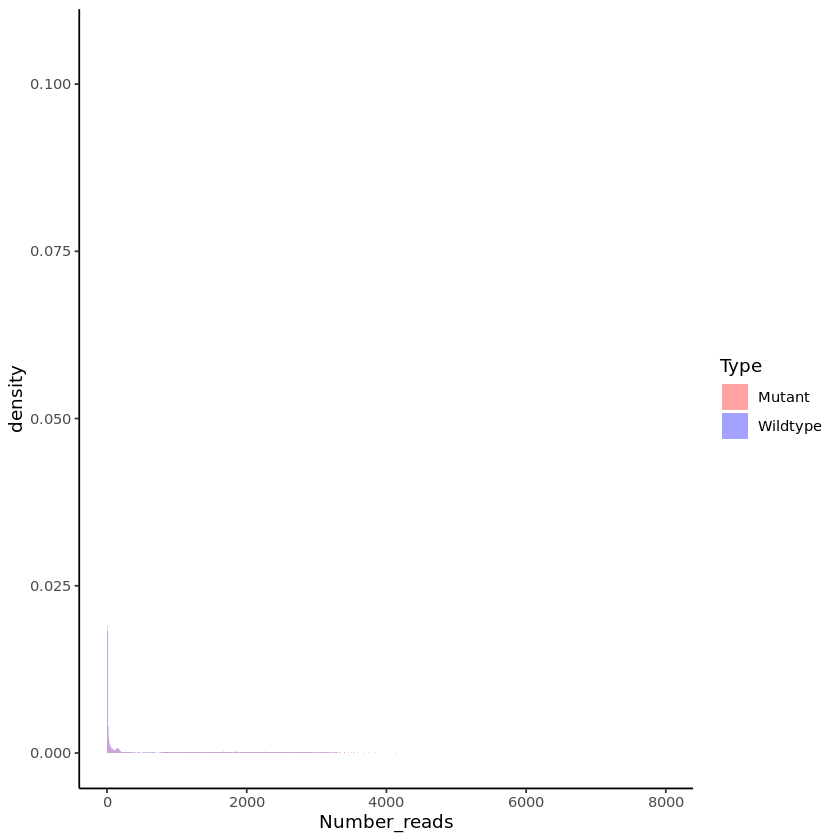

In [5]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)


### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(4)    G I(1) I(2) I(4) I(8)    T 
 270  175   54    3    1  140   26    1    2    1  224 
[1] "MT mutation type"

  D   I   S 
 58  30 809 
[1] "MT mutation structure"

gRNA Rest   U6 
 601  214   82 


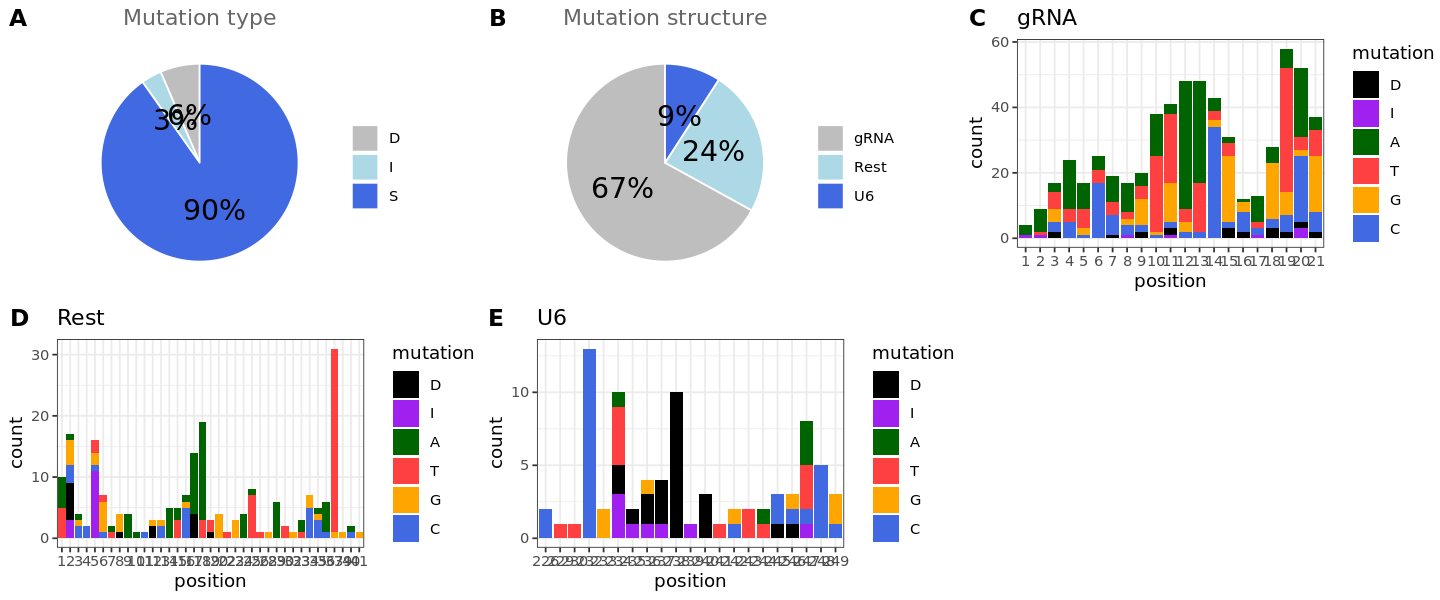

In [6]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)


* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [7]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.857   1.000  11.000 

Warning message:
“Removed 44 rows containing non-finite values (stat_count).”


[1] 58

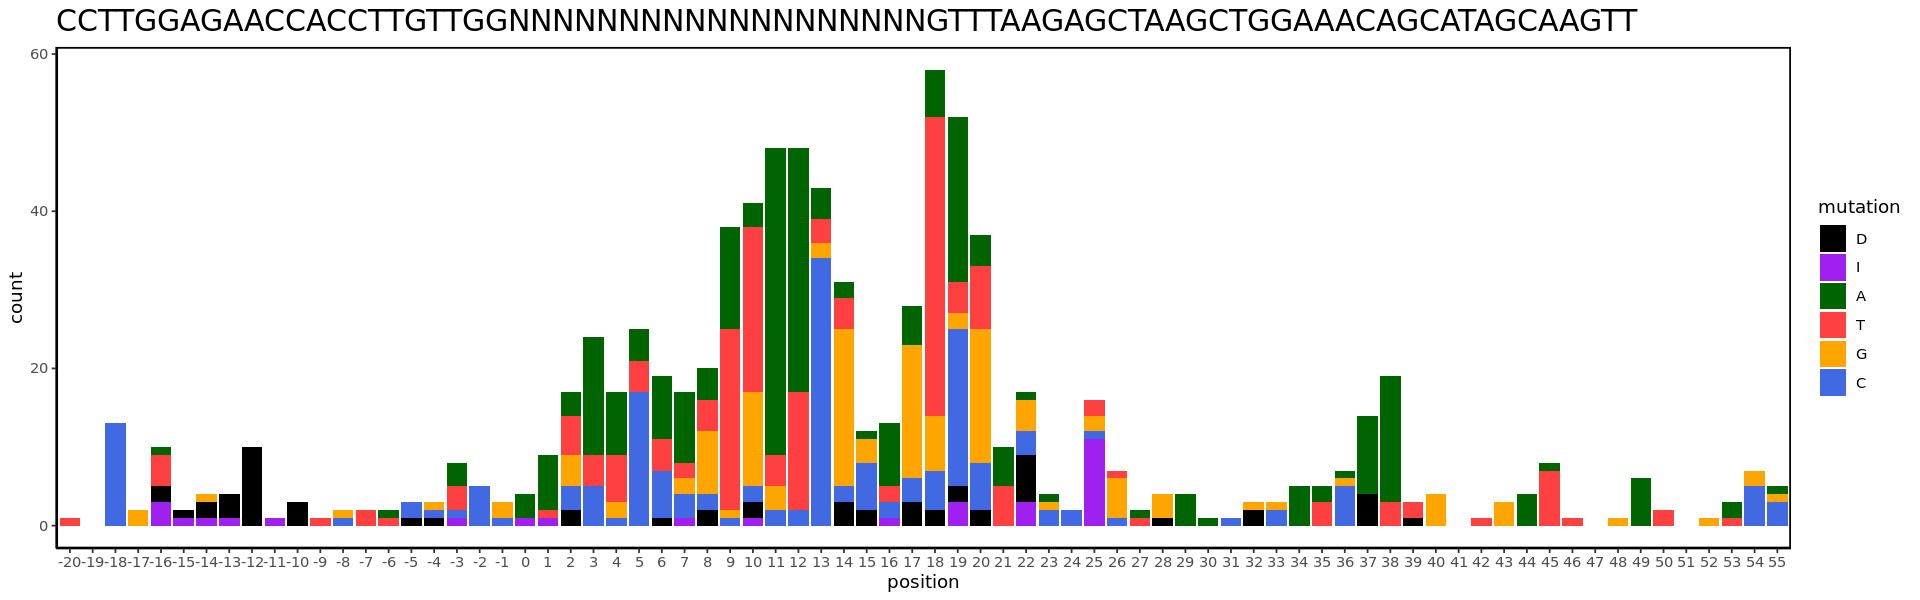

In [8]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
max(table(MT2$position))
#dev.off()

### Cell assignment

Rows: 13970 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'cb'. You can override using the `.groups` argument.


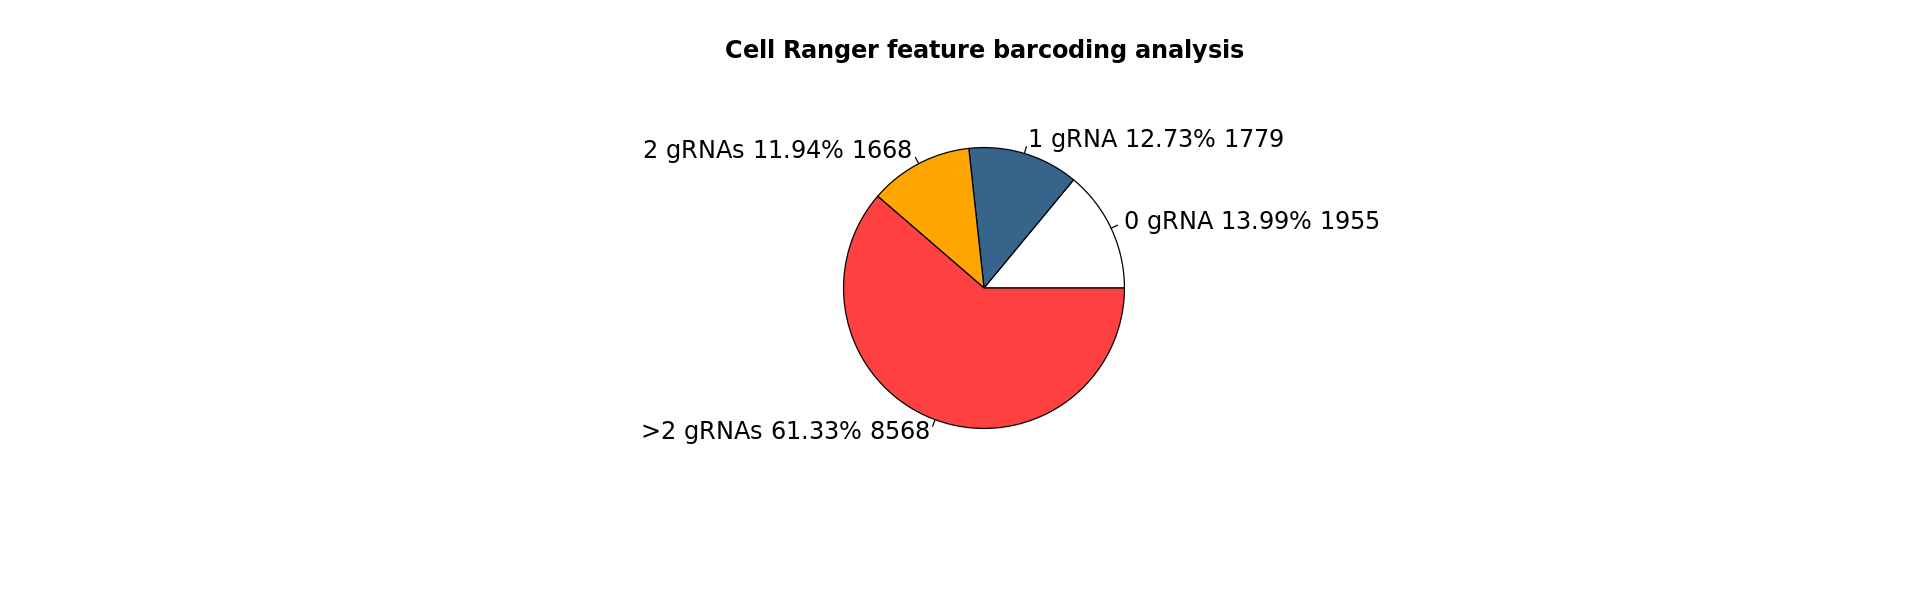

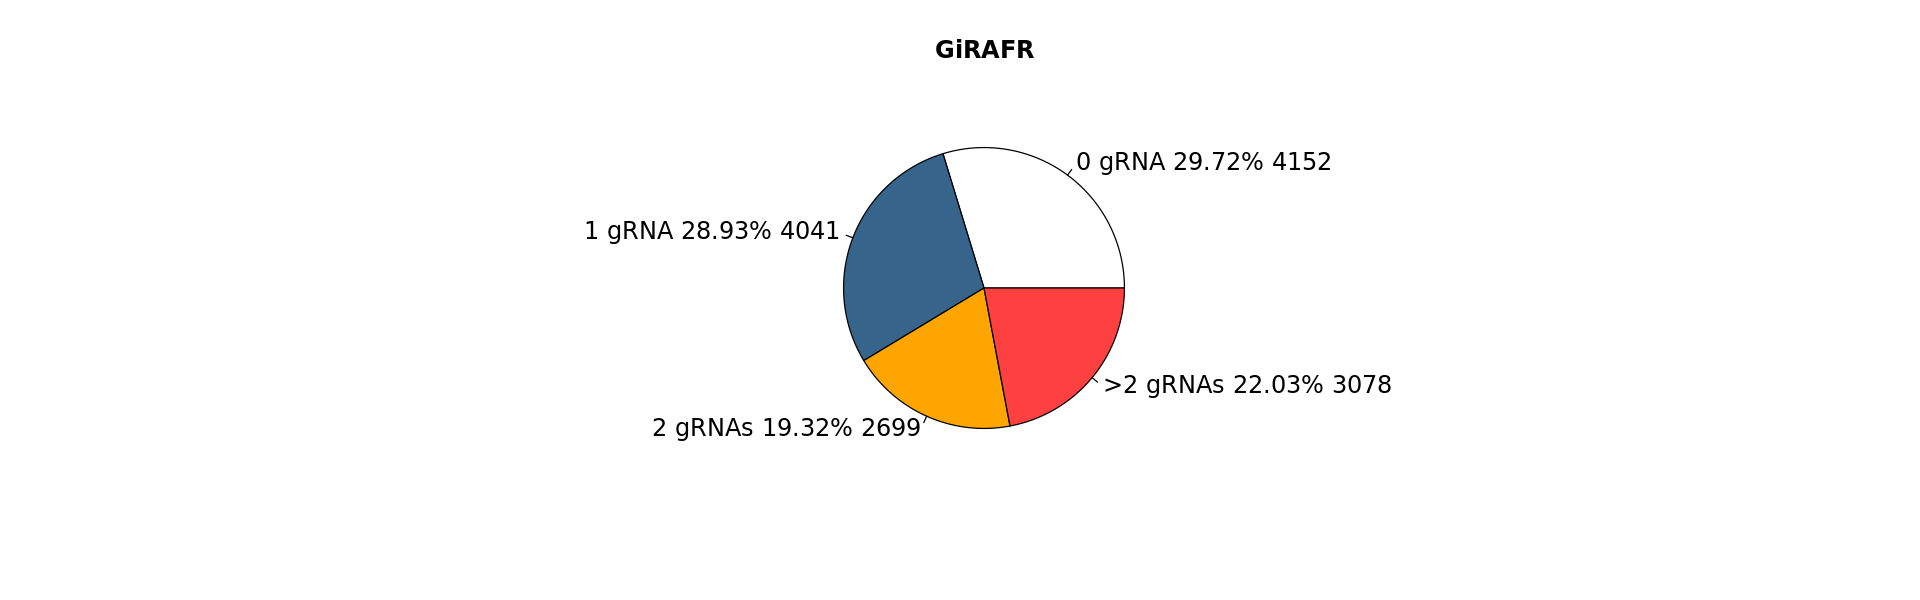

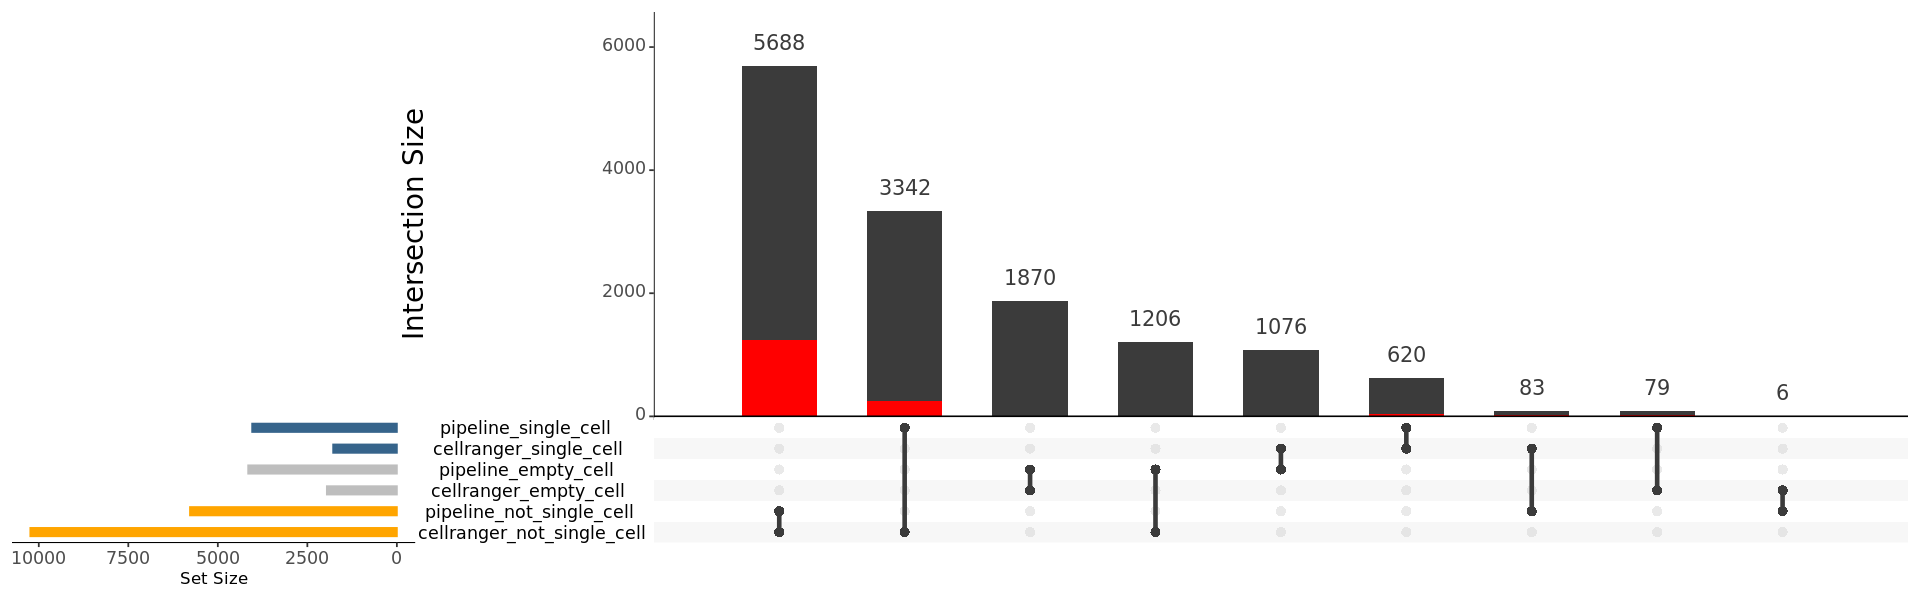

In [9]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_Neuron/feature_barcoding_analysis/iPSC_lane1//outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_Neuron/feature_barcoding_analysis/iPSC_lane1/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"

compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)


In [10]:
girafr.umi.threshold <- read.table('./GiRAFR_outputs/Tian_Neuron/sample1/gRNA.umi.threshold.txt')
girafr.umi.threshold$V1 <- sub('_gene','',girafr.umi.threshold$V1)
cellranger.umi.threshold <- read.table('/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_Neuron/feature_barcoding_analysis/iPSC_lane1/outs/crispr_analysis/protospacer_umi_thresholds.csv', sep = ',', header = T)


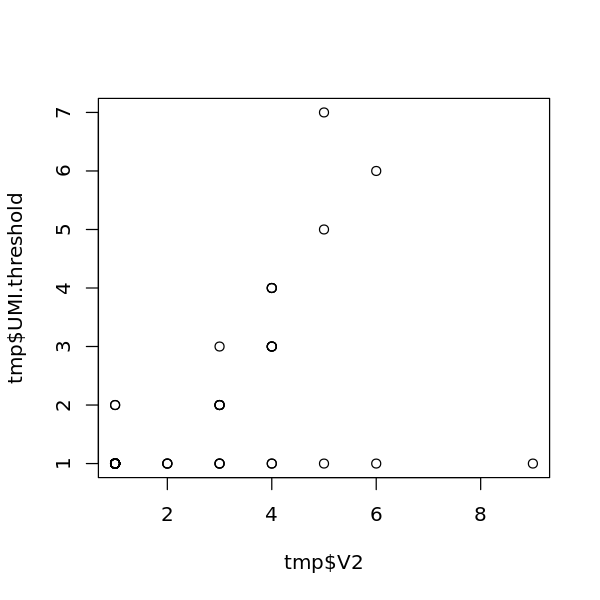

In [15]:
options(repr.plot.width = 5, repr.plot.height = 5)
tmp <- merge(girafr.umi.threshold, cellranger.umi.threshold, by.x = 'V1', by.y = 'Protospacer')
plot(tmp$V2, tmp$UMI.threshold)
options(repr.plot.width = 8, repr.plot.height = 8)

# iPSC_lane2

GSM3543621	CROP-seq_iPSC_sgRNA_enrichment_for_lane2

In [12]:
input_dir = './GiRAFR_outputs/Tian_Neuron/sample2/'
output_dir = './figures_results/Tian_Neuron/sample2'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 11359"
[1] "Wildtype UMI: 214267"
[1] "Mutant UMI: 23468"


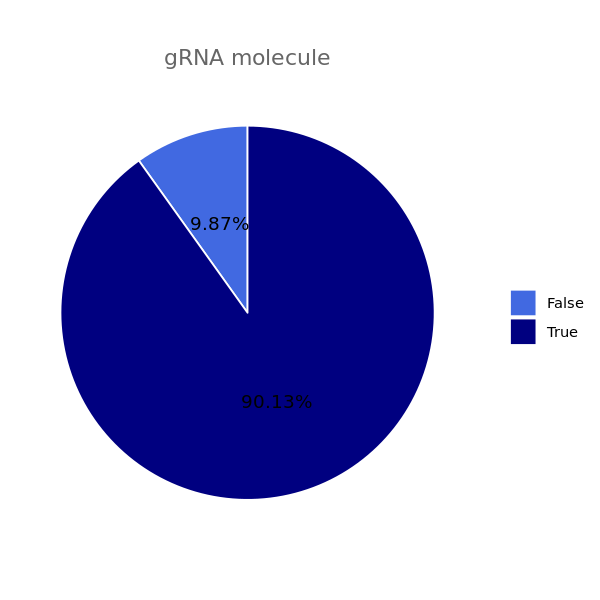

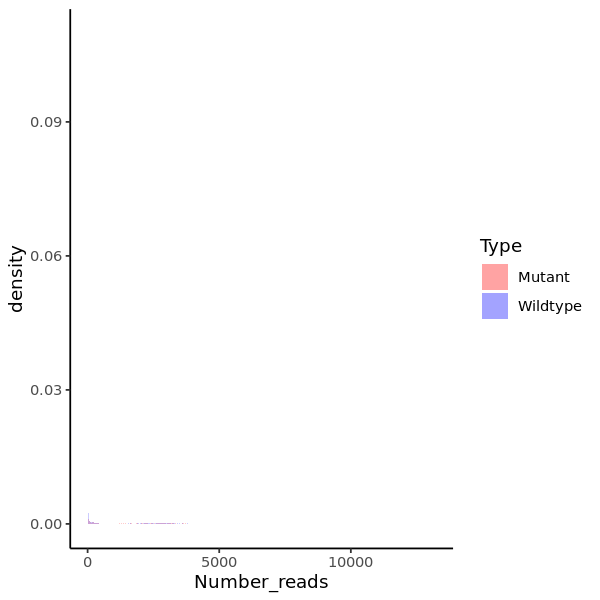

In [13]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)

### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(3)    G I(1) I(3) I(5)    T 
 295  190   47    6    4  141   27    2    1  254 
[1] "MT mutation type"

  D   I   S 
 57  30 880 
[1] "MT mutation structure"

gRNA Rest   U6 
 688  182   97 


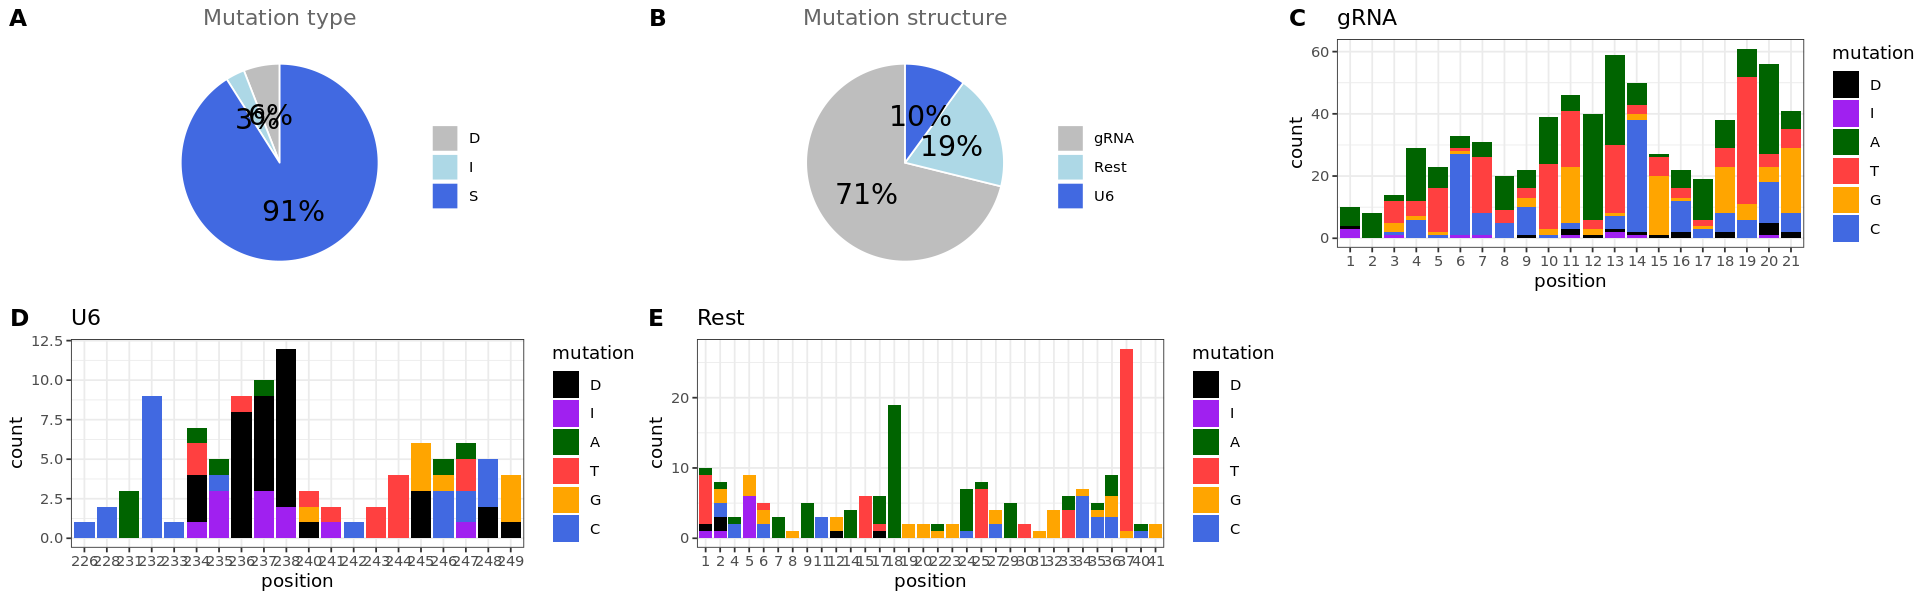

In [17]:
options(repr.plot.width = 16, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)

* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [18]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.978   1.000  11.000 

Warning message:
“Removed 43 rows containing non-finite values (stat_count).”


[1] 61

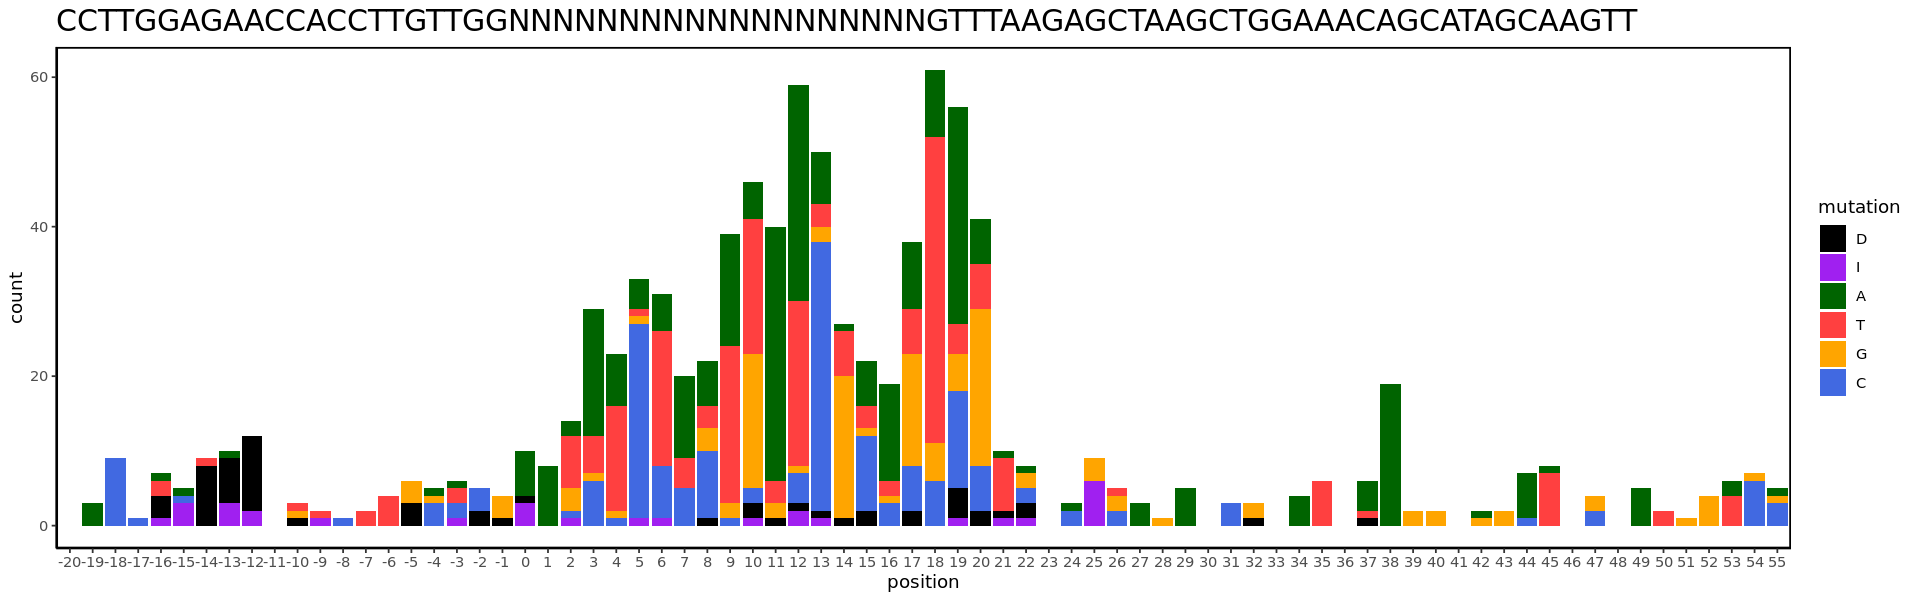

In [19]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
max(table(MT2$position))
#dev.off()

### Cell assignment

Rows: 12331 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'cb'. You can override using the `.groups` argument.


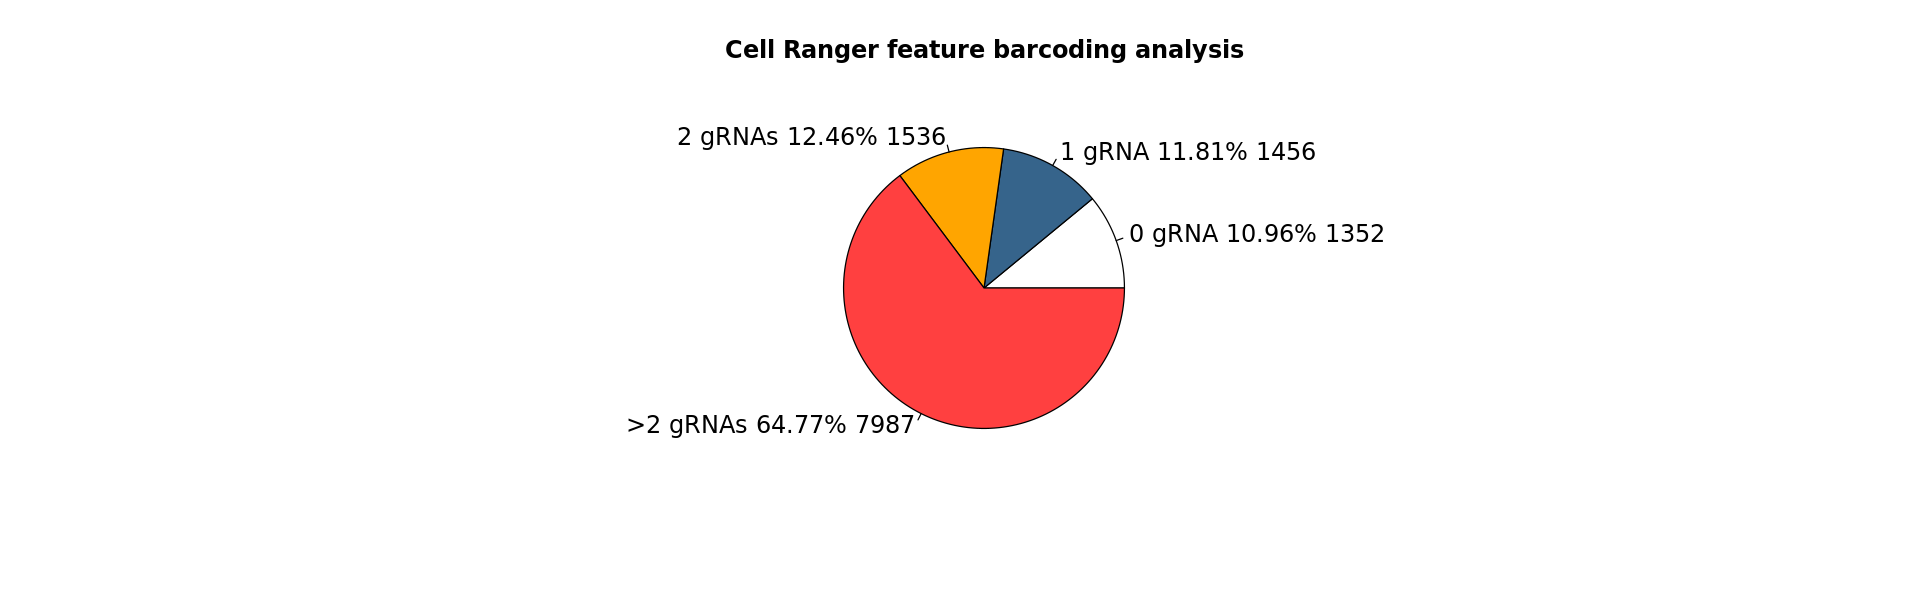

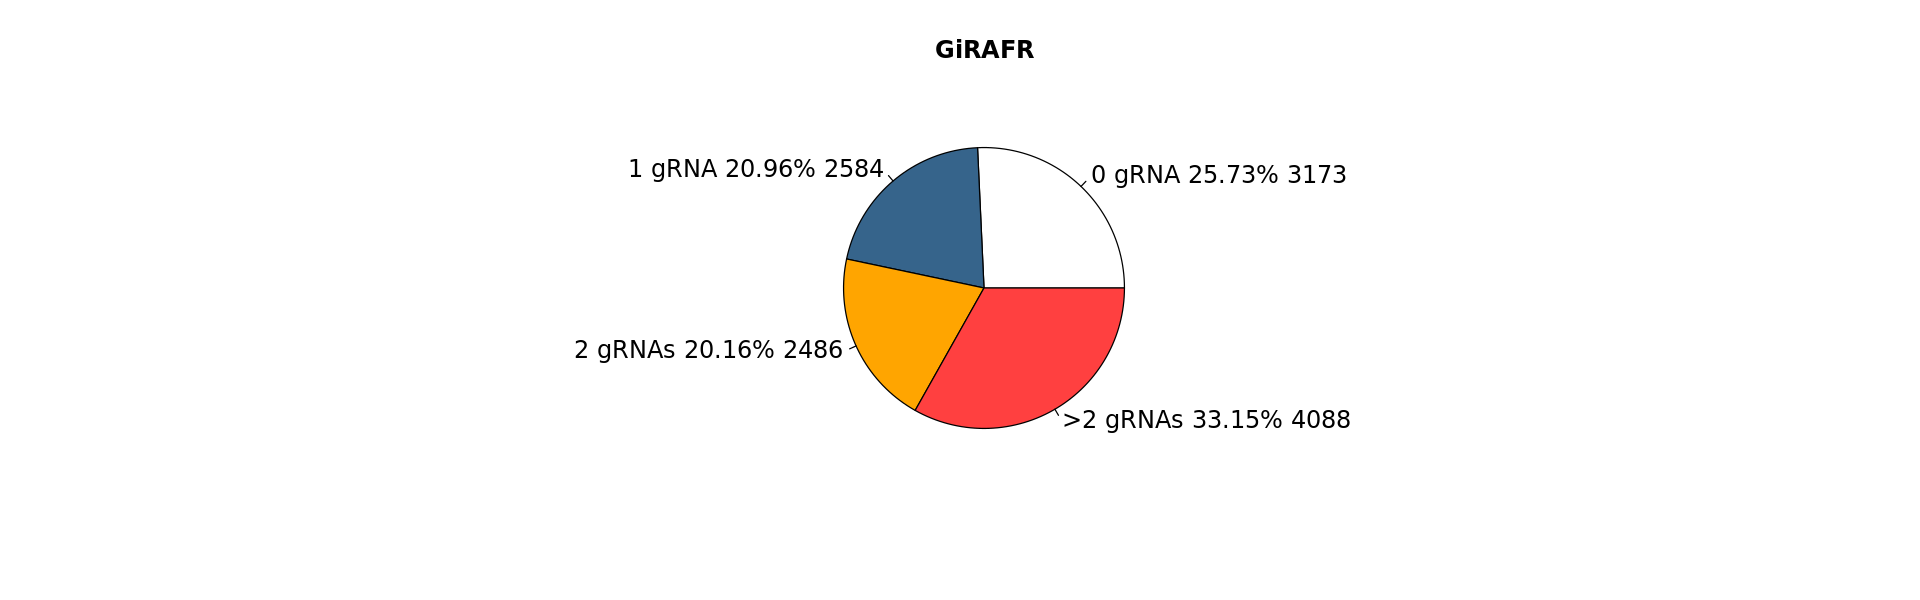

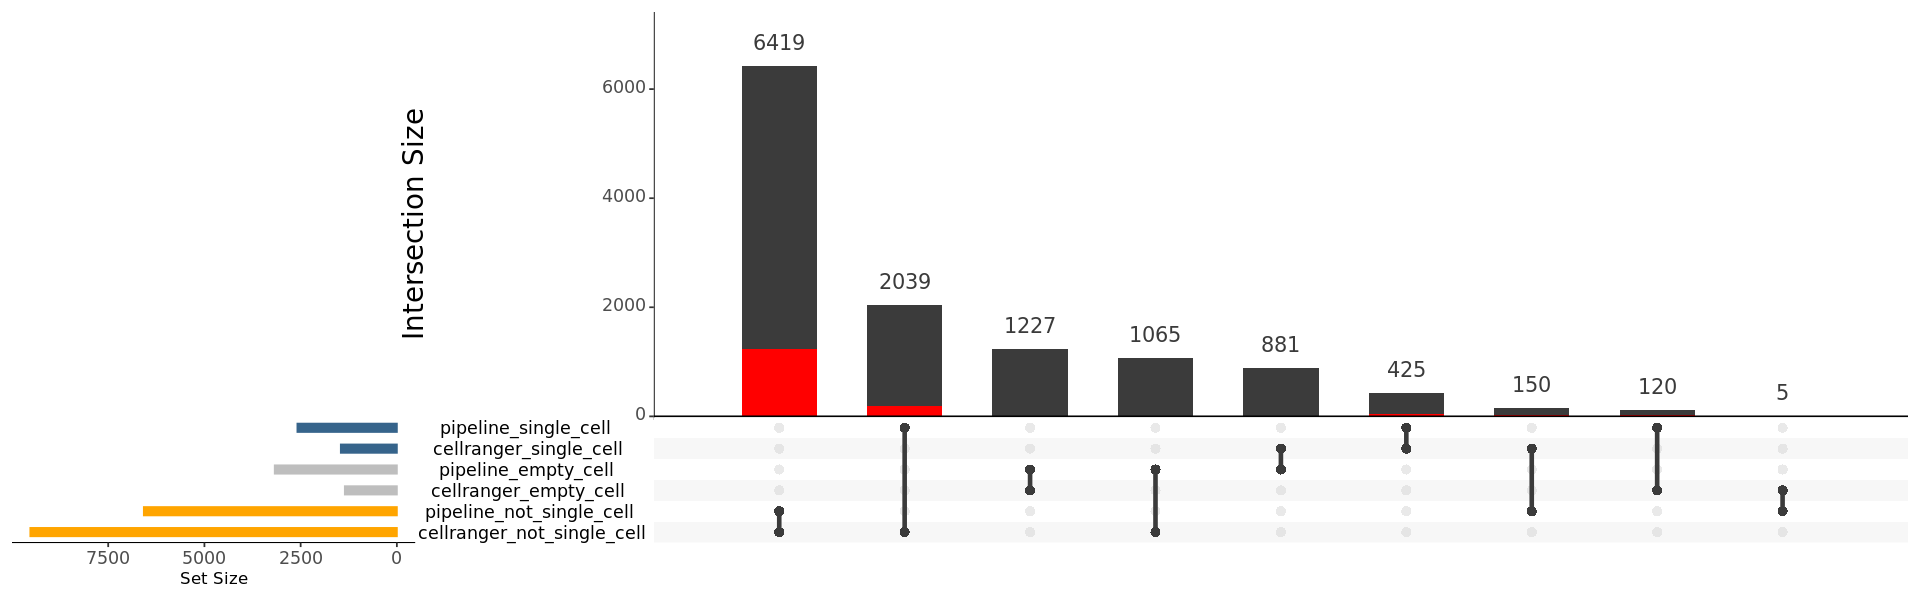

In [20]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_Neuron/feature_barcoding_analysis/iPSC_lane2//outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_Neuron/feature_barcoding_analysis/iPSC_lane2/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"
compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)

# combine samples MT position

Warning message:
“Removed 87 rows containing non-finite values (stat_count).”
Warning message:
“Removed 87 rows containing non-finite values (stat_count).”


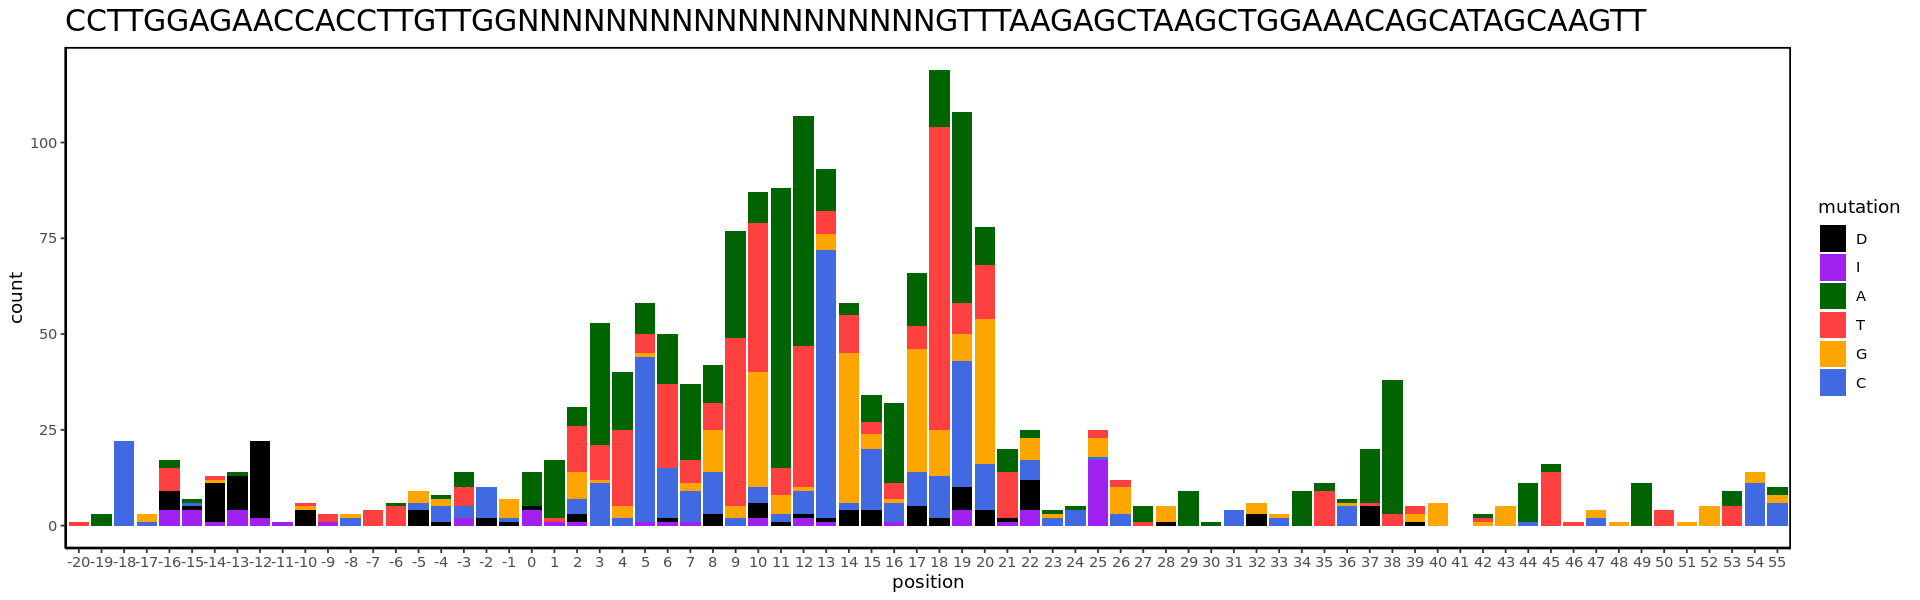

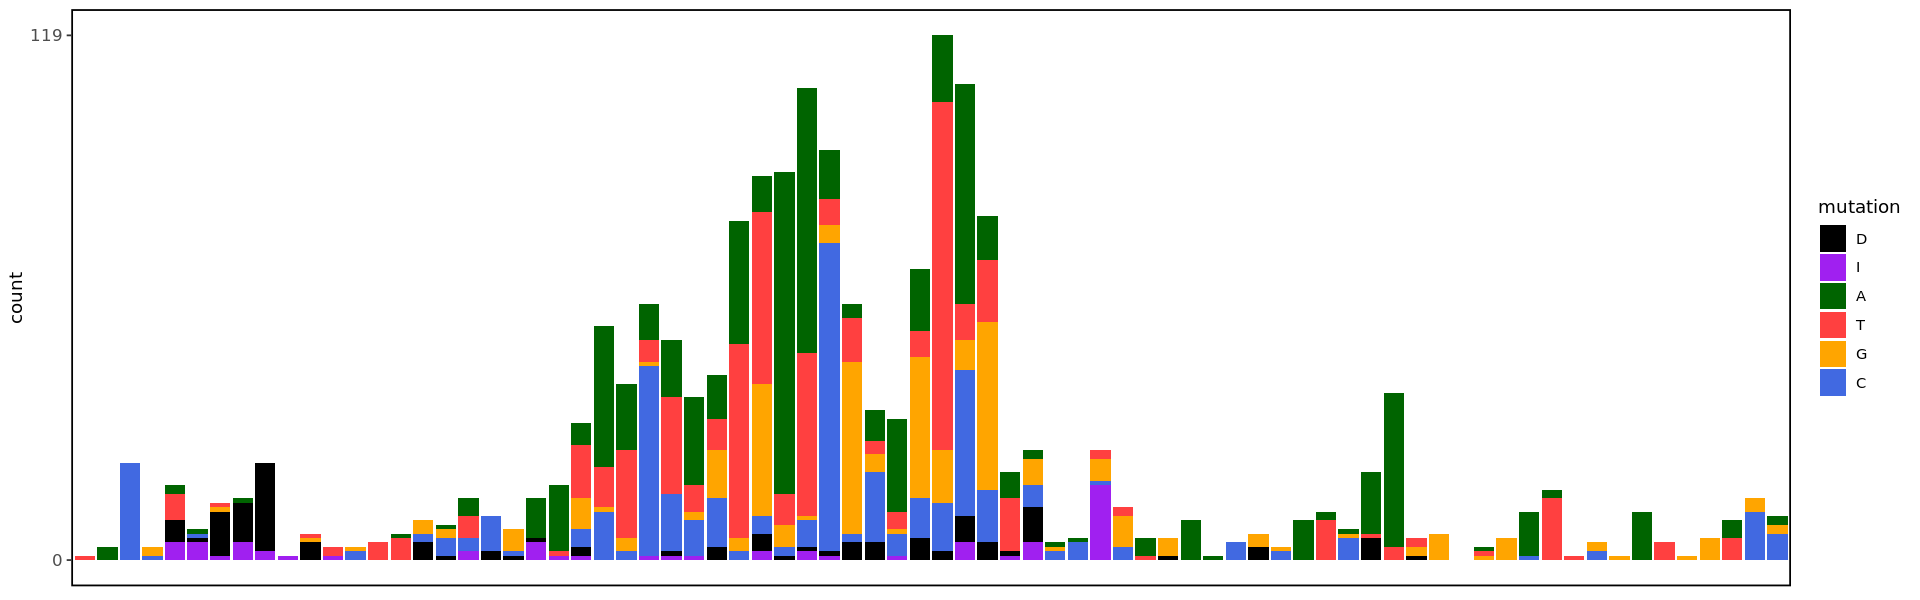

In [21]:
rm(list = ls())
my_colors <- c("D" = 'black', 'I' = 'purple', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

input_dir = './GiRAFR_outputs/Tian_Neuron/sample1/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample1 <- read.table(MT_file, header = FALSE)
colnames(MT_sample1) <- c('gene name','structure','structure length', 'position','mutation','variant number')

input_dir = './GiRAFR_outputs/Tian_Neuron/sample2/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample2 <- read.table(MT_file, header = FALSE)
colnames(MT_sample2) <- c('gene name','structure','structure length', 'position','mutation','variant number')

#save_pdf <- paste0('./figures_results/Tian_Neuron/', 'Combined.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)

MT2 <- rbind(MT_sample1, MT_sample2)
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20, 55, by =1))
MT2$mutation2 <- MT2$mutation
MT2$mutation2[grepl('D', MT2$mutation2)] <- 'D' 
MT2$mutation2[grepl('I', MT2$mutation2)] <- 'I'
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))


ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar()+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')


ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar()+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme(panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      axis.title.x=element_blank(),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
      axis.text.y = element_text(size=10),
      plot.title = element_text(size = 18))+
scale_x_discrete(limits = levels(MT2$position))+scale_y_continuous(breaks = c(0,max(table(MT2$position))))

#dev.off()

In [22]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /vsc-hard-mounts/leuven-data/334/vsc33470/miniconda3/envs/r4-base/lib/libopenblasp-r0.3.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] readr_2.1.2        dplyr_1.0.9        tidyr_1.2.0        ggpubr_0.4.0.999  
[5] sp_1.5-0           SeuratObject_4.1.0 Seurat_4.1.1       UpSetR_1.4.0      
[9] ggplot2_3.3.6     

loaded via a namespace (and not attached):
  [1] Rtsne_0.16            colorspace_2.0-3